### **1. Configuración del ambiente**

En el proyecto usaremos 5 variables que serán manipuladas dentro de varias funciones, estas variables son conocidas como variables globales, es necesario que las definas aquí de la siguiente forma:

`global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision `✅ 

In [1]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
#!python -V
#print('------')
#!pip show Pandas | grep 'Name\|Version'
#print('------')
#!pip show Numpy | grep 'Name\|Version'
#rint('------')
#!pip show Matplotlib | grep 'Name\|Version'
from IPython.display import clear_output
import time
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request
from urllib.error import HTTPError, URLError
import requests

### **2. Obtención de datos**

### **2.1**
 Crea una funcion importar_base_bitcoin() ✅ , dentro de ella, define nuevamente las variables globales(ver Paso1)✅ 
Utiliza la biblioteca yfinance ✅ 
deberás extraer el histórico de los últimos 7 días ✅ en intervalos de 5 minutos✅ , 
este histórico deberás guardarlo en el dataframe **df_bitcoin**.✅ 

In [2]:
def importar_base_bitcoin():

  global df_bitcoin
  bitcoin_symbol = 'BTC-USD'
  datos_btc = yf.Ticker(bitcoin_symbol).history(period='7d', interval='5m')
  df_bitcoin = pd.DataFrame(datos_btc)
  return df_bitcoin
  
importar_base_bitcoin()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-05-16 19:25:00+00:00,27052.705078,27052.705078,27041.470703,27041.470703,0,0.0,0.0
2023-05-16 19:30:00+00:00,27037.251953,27040.283203,27036.736328,27036.736328,0,0.0,0.0
2023-05-16 19:35:00+00:00,27034.689453,27034.689453,27007.177734,27007.177734,0,0.0,0.0
2023-05-16 19:40:00+00:00,26995.023438,26995.734375,26987.000000,26989.074219,2893824,0.0,0.0
2023-05-16 19:45:00+00:00,26993.054688,26993.054688,26973.837891,26973.837891,15431680,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-22 21:15:00+00:00,26899.230469,26899.230469,26886.929688,26886.929688,0,0.0,0.0
2023-05-22 21:20:00+00:00,26883.333984,26915.484375,26883.333984,26915.484375,0,0.0,0.0
2023-05-22 21:25:00+00:00,26946.486328,26946.486328,26916.955078,26916.955078,8731648,0.0,0.0


### **2.2**
Crea una funcion **extraer_tendencias**() ✅ define nuevamente las variables globales ✅  
Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD ✅ 
y la variación de su precio en la última hora 1h % . ✅ 
El precio deberás convertirlo a float ✅  y guardarlo en la variable llamada **precio_actual**. ✅ 
Ahora, en la variable tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.✅ 

In [3]:
def extraer_tendencias():
    global precio_actual, tendencia
    html = requests.get('https://coinmarketcap.com/')
    soup = BeautifulSoup(html.content, 'html.parser')
    table = soup.find("table", class_="sc-beb003d5-3 ieTeVa cmc-table") #busca la primera tabla
    tbody_list = table.find_all("tbody") #busca tbody
    primer_tbody = tbody_list[0] # Acceder al primer tbody
    primera_fila = primer_tbody.find("tr")# encuentro la primera fila (tr) dentro del primer tbody


    moneda = primera_fila.find_all("td")[2].text
    todos_precios = (primera_fila.findAll('div',{'class':['sc-cadad039-0 clgqXO fall','sc-cadad039-0 clgqXO rise','sc-cadad039-0 clgqXO']}))
    precio_actual=float(todos_precios[0].get_text().replace('$','').replace(',',''))
    
    porcentaje = primera_fila.find_all("td")[4].text
    class_list = primera_fila.find_all("td")[4]
    try:
        if class_list.find('span', class_='icon-Caret-down')['class'] is not None:
            tendencia = "Baja"
        else:
            tendencia = "Alta"
    except TypeError:
        tendencia = "Alta"

    return [precio_actual, tendencia]
extraer_tendencias()

[26933.14, 'Alta']

### **3. Limpieza de datos**

Crea una funcion **limpieza_datos()**✅ 
crea una copia de la base df_bitcoin para que realices la limpieza en esta nueva base(**df_bitcoin_limpio**) ✅ 
Analiza la base df_bitcoin_limpio, identifica duplicados en el índice✅  y trátalos para quedarte con sólo índices únicos.✅ 
Luego busca por valores nulos en la columna Close y trátalos.✅ 
Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.✅ 
Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de boxplot para identificarlos.✅ 
Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.✅ 
Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.✅ 


In [4]:
def limpieza_datos():
    global media_bitcoin,df_bitcoin_limpio  
    df_data=importar_base_bitcoin()
    df_bitcoin_limpio= df_data[['Close','Volume']]
    df = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] != 0]
    duplicados = df.index.duplicated()
    df = df[~duplicados]
    df_bitcoin_limpio = df[df['Close'] != 0]
    df_boxplot = df_bitcoin_limpio.copy()
    #return df_bitcoin_limpio

    ###################################FILTRO ENTRE Q1 Y Q3 ###################################
    cuartiles = [0, 0.25, 0.5, 0.75, 1]
    valores = df_bitcoin_limpio['Close'].quantile(cuartiles)
    df_bitcoin_limpio = df.query('Close > ' + str(int(valores[0.25])) + ' & Close < ' + str(int(valores[0.75])))    
    return [df_bitcoin_limpio , df_boxplot]
limpieza_datos()

[                                  Close    Volume
 Datetime                                         
 2023-05-16 19:40:00+00:00  26989.074219   2893824
 2023-05-16 19:45:00+00:00  26973.837891  15431680
 2023-05-16 19:50:00+00:00  26928.574219   1563648
 2023-05-16 19:55:00+00:00  26946.886719  60355584
 2023-05-16 20:05:00+00:00  26958.968750   7939072
 ...                                 ...       ...
 2023-05-22 20:45:00+00:00  26864.669922   1289216
 2023-05-22 20:50:00+00:00  26900.308594   8828928
 2023-05-22 20:55:00+00:00  26903.310547  31050752
 2023-05-22 21:25:00+00:00  26916.955078   8731648
 2023-05-22 21:30:00+00:00  26935.898438   2963456
 
 [460 rows x 2 columns],
                                   Close    Volume
 Datetime                                         
 2023-05-16 19:40:00+00:00  26989.074219   2893824
 2023-05-16 19:45:00+00:00  26973.837891  15431680
 2023-05-16 19:50:00+00:00  26928.574219   1563648
 2023-05-16 19:55:00+00:00  26946.886719  60355584
 202

> ***Boxplot paso anterior con datos limpios sin el filtro***




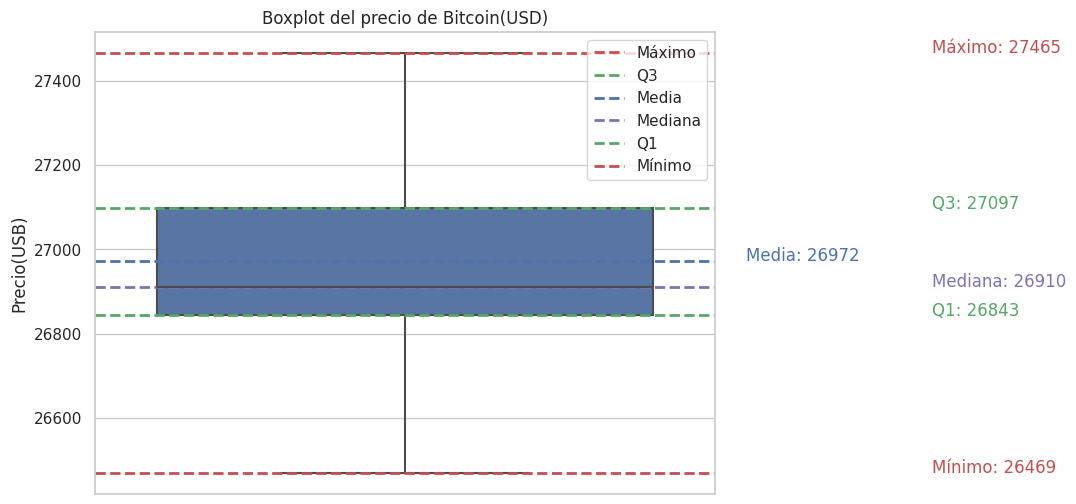

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
close = limpieza_datos()[1]["Close"]
max_value = close.max()
q3_value =close.quantile(0.75)
mean_value = close.mean()
median_value = close.median()
q1_value = close.quantile(0.25)
min_value = close.min()

sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))  
sns.boxplot(y=close, orient='v')


plt.axhline(max_value, color='r', linestyle='--', linewidth=2, label='Máximo')
plt.axhline(q3_value, color='g', linestyle='--', linewidth=2, label='Q3')
plt.axhline(mean_value, color='b', linestyle='--', linewidth=2, label='Media')
plt.axhline(median_value, color='m', linestyle='--', linewidth=2, label='Mediana')
plt.axhline(q1_value, color='g', linestyle='--', linewidth=2, label='Q1')
plt.axhline(min_value, color='r', linestyle='--', linewidth=2, label='Mínimo')


plt.text(0.85, max_value, f'Máximo: {int(max_value)}', color='r')
plt.text(0.85, q3_value, f'Q3: {int(q3_value)}', color='g')
plt.text(0.55, mean_value, f'Media: {int(mean_value)}', color='b')
plt.text(0.85, median_value, f'Mediana: {int(median_value)}', color='m')
plt.text(0.85, q1_value, f'Q1: {int(q1_value)}', color='g')
plt.text(0.85, min_value, f'Mínimo: {int(min_value)}', color='r')


plt.title('Boxplot del precio de Bitcoin(USD)')
plt.ylabel('Precio(USB)')


plt.legend()


plt.show()



> ***Boxplot paso anterior con datos limpios con el filtro***

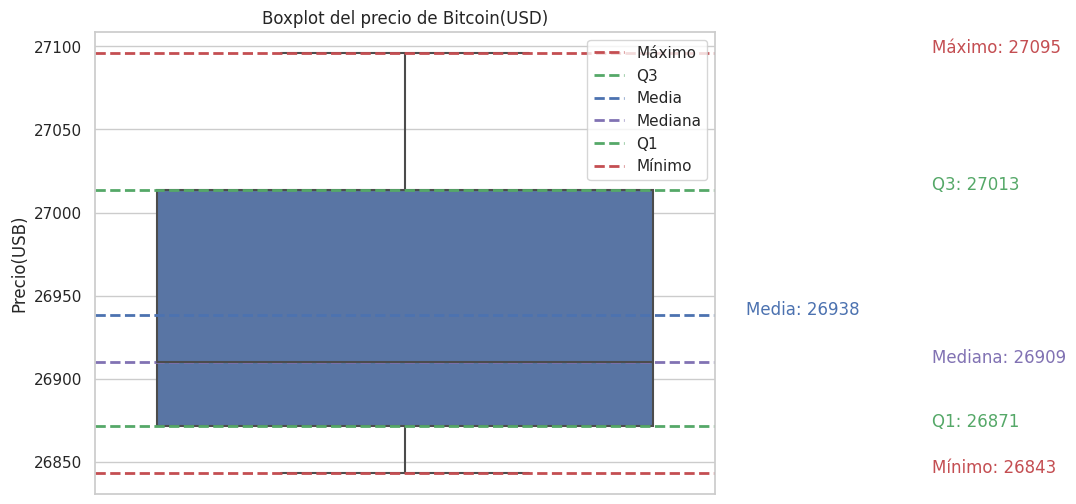

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

close = limpieza_datos()[0]["Close"]
max_value = close.max()
q3_value =close.quantile(0.75)
mean_value = close.mean()
median_value = close.median()
q1_value = close.quantile(0.25)
min_value = close.min()

sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))  
sns.boxplot(y=close, orient='v')


plt.axhline(max_value, color='r', linestyle='--', linewidth=2, label='Máximo')
plt.axhline(q3_value, color='g', linestyle='--', linewidth=2, label='Q3')
plt.axhline(mean_value, color='b', linestyle='--', linewidth=2, label='Media')
plt.axhline(median_value, color='m', linestyle='--', linewidth=2, label='Mediana')
plt.axhline(q1_value, color='g', linestyle='--', linewidth=2, label='Q1')
plt.axhline(min_value, color='r', linestyle='--', linewidth=2, label='Mínimo')


plt.text(0.85, max_value, f'Máximo: {int(max_value)}', color='r')
plt.text(0.85, q3_value, f'Q3: {int(q3_value)}', color='g')
plt.text(0.55, mean_value, f'Media: {int(mean_value)}', color='b')
plt.text(0.85, median_value, f'Mediana: {int(median_value)}', color='m')
plt.text(0.85, q1_value, f'Q1: {int(q1_value)}', color='g')
plt.text(0.85, min_value, f'Mínimo: {int(min_value)}', color='r')


plt.title('Boxplot del precio de Bitcoin(USD)')
plt.ylabel('Precio(USB)')


plt.legend()


plt.show()

### **4. Tomar decisiones**

Crea una funcion **tomar_decisiones**() ✅ , dentro de ella, define nuevamente las variables globales(ver Paso1) ✅ y escribe tu código:

*Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:
Si el **precio actual es mayor/igual que el precio promedio** y la tendencia es de baja, entonces guarda el valor **‘Vender’**.✅
Si el **precio actual es menor que el precio promedio** y la tendencia es de alta, entonces guarda el valor **‘Comprar’**.✅
Si **ninguna de las 2 condiciones anteriores se cumple**, entonces guarda el valor *✅

In [7]:
def tomar_decisiones():
    global symbol, period, interval, df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    
    precio_actual = extraer_tendencias()[0]
    tendencia=extraer_tendencias()[1]
    media_bitcoin = limpieza_datos()[0]["Close"].mean()
    if precio_actual >= media_bitcoin and tendencia == 'Baja':
        algoritmo_decision = 'Vender'
    elif precio_actual < media_bitcoin and tendencia == 'Alta':
        algoritmo_decision = 'Comprar'
    else:
        algoritmo_decision = 'Esperar'

    print(f"Media = {int(media_bitcoin)} \nDecisión = {algoritmo_decision}\nTendencia = {tendencia}\nPrecio_ahora = {int(precio_actual)}\n\n\nDesicion a automatizar:")
    return algoritmo_decision
tomar_decisiones()

Media = 26938 
Decisión = Comprar
Tendencia = Alta
Precio_ahora = 26933


Desicion a automatizar:


'Comprar'

### **5. Visualización**

Crea una funcion **visualizacion()** ✅  , dentro de ella, define nuevamente las variables globales(ver Paso1)✅  y escribe tu código:

Adiciona una nueva columna (Promedio) al dataframe original df_bitcoiny almacena el valor de nuestra variable **media_bitcoin**.✅ 

Configura el tamaño del gráfico en una proporción de **16x5**.✅ 

Adiciona un título al gráfico.✅ 

Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base df_bitcoin. ✅ 

Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base df_bitcoin. ✅ 

Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo. ✅ 

Finalmente, usando el método show()  ✅  muestra en pantalla el gráfico que acabamos de configurar.


Media = 26938 
Decisión = Comprar
Tendencia = Alta
Precio_ahora = 26933


Desicion a automatizar:


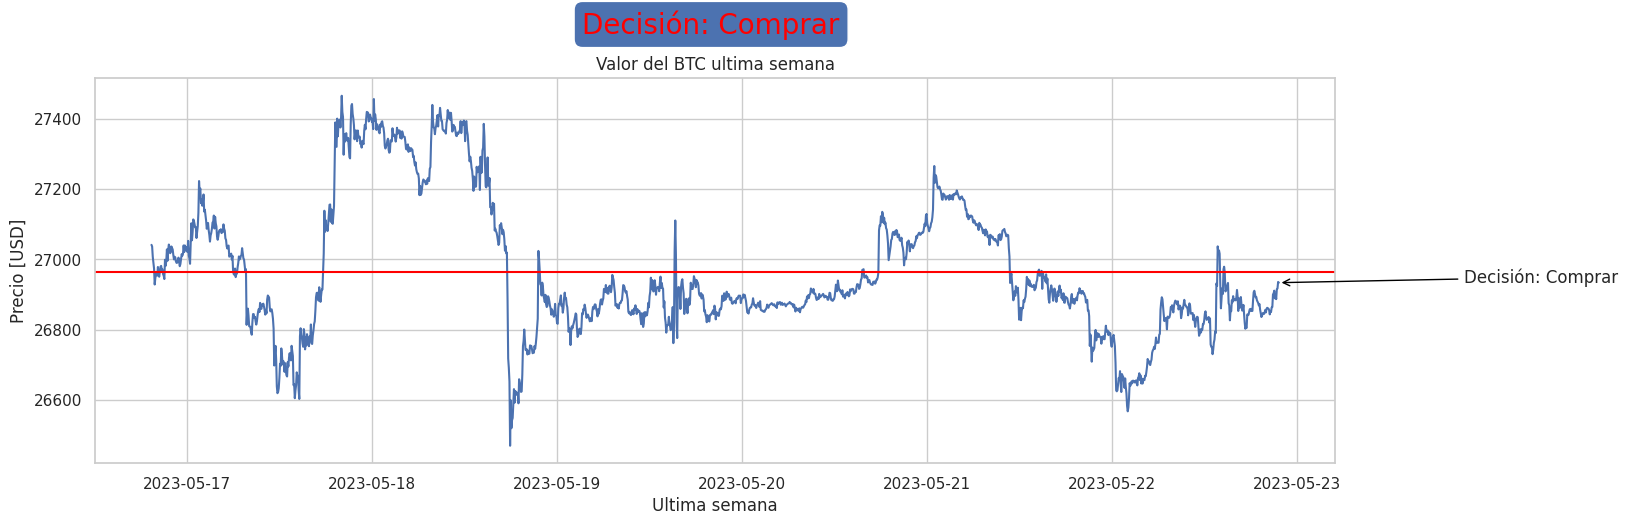

In [8]:
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, df_bitcoin_limpio
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(16, 5))


    sns.lineplot(data=df_bitcoin, x=df_bitcoin.index, y="Close", ax=ax)

    mean_price = df_bitcoin["Close"].mean()
    ax.axhline(mean_price, color="red", linestyle="-") 

    ax.set_xlabel("Ultima semana")
    ax.set_ylabel("Precio [USD]")
    ax.set_title("Valor del BTC ultima semana")

    decision = tomar_decisiones()
    last_data = df_bitcoin.iloc[-1]

    ax.annotate(f"Decisión: {decision}", xy=(last_data.name, last_data['Close']),
            xytext=(last_data.name + pd.Timedelta(days=1), last_data['Close']), xycoords='data',
            arrowprops=dict(arrowstyle='->', color='black'))



    fig.text(0.51, 0.97, f"Decisión: {decision}", ha='center', fontsize=20, color='red',
             bbox=dict(boxstyle='round'))

    plt.show()

visualizacion()


### **6. Automatización**

Importa el método '**clear_output**()'✅ 

Importa también la biblioteca ‘time’ ✅ 

utilizaremos su método time.sleep(300) ✅ 



```
while(True): ✅ 
  clear_output()✅ 
  importar_base_bitcoin()✅ 
  extraer_tendencias()✅ 
  limpieza_datos()✅ 
  tomar_decisiones()✅ 
  visualizacion()✅ 
  time.sleep(300)✅
```




Media = 26938 
Decisión = Comprar
Tendencia = Alta
Precio_ahora = 26933


Desicion a automatizar:
Media = 26938 
Decisión = Comprar
Tendencia = Alta
Precio_ahora = 26933


Desicion a automatizar:


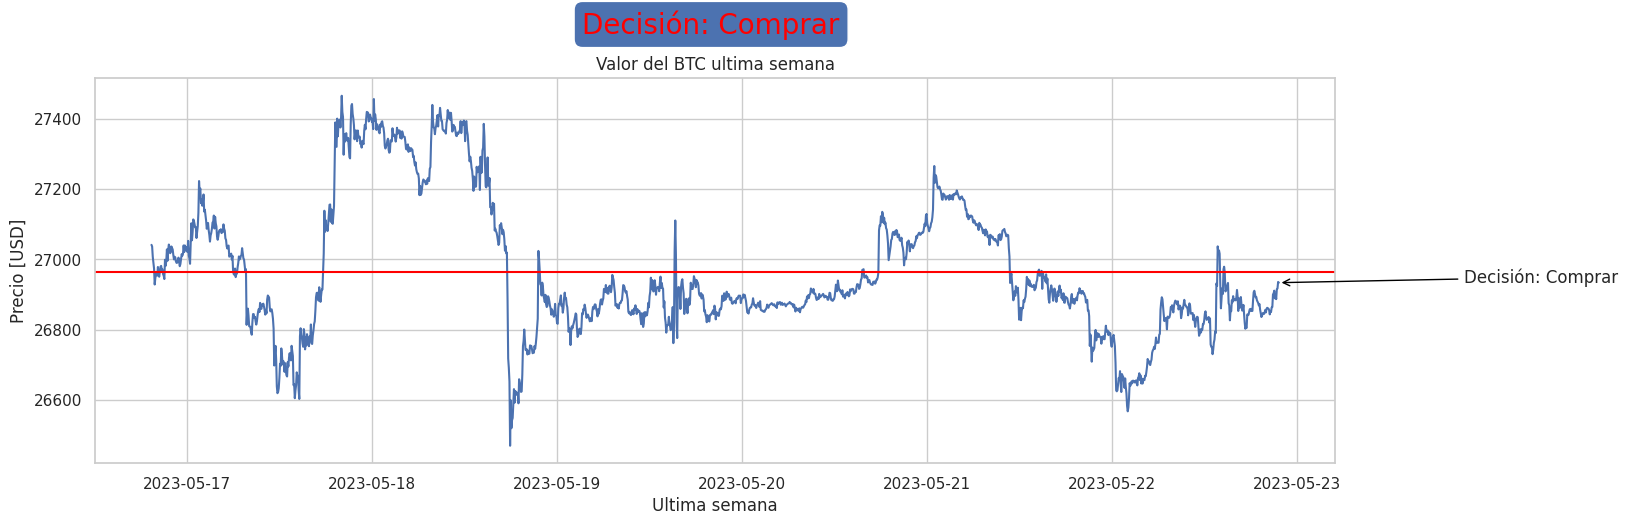

In [ ]:
def automatizar():
  while True:
    clear_output()
    importar_base_bitcoin()
    extraer_tendencias()
    limpieza_datos()[0]
    tomar_decisiones()
    visualizacion()
    time.sleep(300)
automatizar()